# Credit Card Customer Churn Analysis – ETL Process

The dataset contains customer information from a bank, including credit card usage, demographic details, account activity, and a churn indicator.

The objective of this ETL process is to:
- Load and inspect the dataset
- Clean and transform the data
- Prepare the dataset for analysis and visualisation


In [ ]:
import pandas as pd

 1. Import Required Libraries

We begin by importing the necessary Python libraries for data handling and exploration.


In [1]:
import pandas as pd
import numpy as np


 2. Load the Dataset

We load the CSV file named `BankChurners.csv` from the local directory. 


In [ ]:
#Step 1. Load the dataset
file_path = r'C:\Users\Sheila\Documents\VSCODE PROJECTS\Hackathon2_Credit_Card_Churn_T5\Data\Raw\BankChurners.csv'
 
df = pd.read_csv(file_path)

# Step 2. Show the first 5 rows
df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


 3. Clean the Dataset

We remove irrelevant columns, rename important ones for clarity, and convert categorical values for analysis.

In this step, we remove:
- `CLIENTNUM`: a unique identifier not useful for analysis
- `Unnamed: 0`: an index column accidentally included
- Any column starting with `Naive_Bayes_Classifier`: likely output from a machine learning tool not needed for our analysis, for now.

We also:
- Rename the churn indicator column for clarity
- Convert churn status into binary values: 1 = Attrited, 0 = Existing




In [9]:
#Step 3. Drop irrelevant or auto-generated columns
columns_to_drop = ['CLIENTNUM', 'Unnamed: 0']
columns_to_drop += [col for col in df.columns if col.startswith('Naive_Bayes_Classifier')]

#Step 4. Drop columns safely (ignore if not found)
df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

#Step 5. Rename churn column
df.rename(columns={'Attrition_Flag': 'Churn_Status'}, inplace=True)

#Step 6. Encode churn status
df['Churn_Status'] = df['Churn_Status'].map({'Attrited Customer': 1, 'Existing Customer': 0})

# Step 7. Show the first 5 rows
df.head()

,Churn_Status,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


4. Generate Complete Descriptive Statistics Table

This expanded statistical summary includes:
- Central tendency (mean, median)
- Dispersion (standard deviation, min, max, IQR)
- Distribution shape (skewness, kurtosis)
- Missing value count

These insights help detect outliers, asymmetry, and data quality issues before modelling or visualisation.


In [ ]:
import numpy as np

#Step 8. Select only numerical columns
num_df = df.select_dtypes(include=[np.number])

#Step 9. Build custom descriptive statistics
stats_df = pd.DataFrame()

stats_df['count'] = num_df.count()
stats_df['mean'] = num_df.mean()
stats_df['std'] = num_df.std()
stats_df['min'] = num_df.min()
stats_df['25%'] = num_df.quantile(0.25)
stats_df['median'] = num_df.median()
stats_df['75%'] = num_df.quantile(0.75)
stats_df['max'] = num_df.max()
stats_df['skewness'] = num_df.skew()
stats_df['kurtosis'] = num_df.kurtosis()
stats_df['missing_values'] = num_df.isnull().sum()

#Step 10. Display nicely in Jupyter
display(stats_df.round(3))


,count,mean,std,min,25%,median,75%,max,skewness,kurtosis,missing_values
Churn_Status,10127,0.161,0.367,0.0,0.000,0.000,0.000,1.000,1.848,1.417,0
Customer_Age,10127,46.326,8.017,26.0,41.000,46.000,52.000,73.000,-0.034,-0.289,0
Dependent_count,10127,2.346,1.299,0.0,1.000,2.000,3.000,5.000,-0.021,-0.683,0
Months_on_book,10127,35.928,7.986,13.0,31.000,36.000,40.000,56.000,-0.107,0.400,0
Total_Relationship_Count,10127,3.813,1.554,1.0,3.000,4.000,5.000,6.000,-0.162,-1.006,0
Months_Inactive_12_mon,10127,2.341,1.011,0.0,2.000,2.000,3.000,6.000,0.633,1.099,0
Contacts_Count_12_mon,10127,2.455,1.106,0.0,2.000,2.000,3.000,6.000,0.011,0.001,0
Credit_Limit,10127,8631.954,9088.777,1438.3,2555.000,4549.000,11067.500,34516.000,1.667,1.809,0
Total_Revolving_Bal,10127,1162.814,814.987,0.0,359.000,1276.000,1784.000,2517.000,-0.149,-1.146,0
Avg_Open_To_Buy,10127,7469.140,9090.685,3.0,1324.500,3474.000,9859.000,34516.000,1.662,1.799,0


5. Insights from Descriptive Statistics
    
    **Credit_Limit & Avg_Open_To_Buy**
    
    -Right-skewed with high kurtosis 

    **Total_Trans_Amt & Total_Ct_Chng_Q4_Q1**
    
    -High positive skewness and kurtosis.

    **Customer_Age**
    
    -Low skewness and kurtosis → almost normally distributed.

    **Churn_Status**
    Binary with ~16.1% churned 

    **Dependent_count**

    Mean = 2.35, Skewness ≈ -0.02, Kurtosis = -0.68
    -Very balanced, almost symmetrical.
   

    **Months_on_book**

    Mean ≈ 36, Range = 13–56 months, Low skewness
    -Good distribution
     

    **Total_Relationship_Count**

    Mean ≈ 3.8, Skewness = -0.16, Kurtosis = -1.00
    -Slightly left-skewed, but well-distributed.No transformation needed
    

   **Months_Inactive_12_mon**

    Mean ≈ 2.34, Skewness = 0.63, Kurtosis = 1.1
    -Some customers are inactive for long periods.
    Maybe we could consider grouping (e.g. 0, 1–2, 3+) to simplify visualisation.

   **Contacts_Count_12_mon**

    Mean ≈ 2.45, Skewness ≈ 0.01, Kurtosis ≈ 0
    -Very balanced distribution.
    -No transformation needed. 

   **Total_Revolving_Bal**

    Mean ≈ 1162, Skewness = -0.15, Kurtosis = -1.14
    -Centered with a healthy spread; small negative skew.
    Well distributed. no transformation needed.

   **Total_Amt_Chng_Q4_Q1**

    Mean = 0.76, Skewness = 1.73, Kurtosis = 9.99
    Positive skew and heavy tails.
    Eliminate extreme values. Useful for behavioural change detection.

   **Total_Trans_Ct**

    Mean ≈ 65, Skewness ≈ 0.15, Kurtosis ≈ -0.37
    Close to normal distribution.
    

   **Avg_Utilization_Ratio**

    Mean ≈ 0.28, Skewness = 0.72, Kurtosis = -0.80
    → Right-skewed; 
    Maybe it is better to agroupate them into usage ranges: Low, Medium, High.


6. Outlier Handling Using IQR Capping

Several numerical features in our dataset showed significant skewness and heavy tails in the descriptive statistics. These outliers can distort visualisations, mislead interpretation.
Thus,  we will apply **IQR capping** to limit extreme values but we will preserve the overall distribution of the data.

 The main reason to apply this method is to:
- Reduces the influence of outliers on charts such as boxplots, histograms, and scatter plots.
- Makes distributions more compact and interpretable.
-

Features that will be capped:
- **Credit_Limit**
- **Avg_Open_To_Buy**
- **Total_Trans_Amt**
- **Total_Amt_Chng_Q4_Q1**
- **Total_Ct_Chng_Q4_Q1**
- **Avg_Utilization_Ratio**



This transformation ensures that these columns are now **suitable for visualisations**, producing clearer and more accurate insights.


Before do the transformation ww will keep  one of the original colums "Credit_limit" in order to do a visual comparison to see the effect of the IQR capping.


In [19]:
#Step 11. Copy original Credit_Limit before transformation
df['Credit_Limit_Original'] = df['Credit_Limit'].copy()

#Step 12. Define IQR capping function
def cap_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

#Step 13. List of features to cap — EXCLUDING 'Credit_Limit'
features_to_cap = [
    'Avg_Open_To_Buy',
    'Total_Trans_Amt',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio'
]

#Step 14. Apply IQR capping only to those features
for col in features_to_cap:
    df[col] = cap_outliers_iqr(df[col])




7. Visualise the Effect of IQR Capping

To understand the impact of IQR capping, we will compare the original and capped distributions of the *Credit_Limit* variable.

We use both histograms and boxplots to illustrate:
- How the outlier range has been trimmed
- How the central distribution has become more visible and interpretable


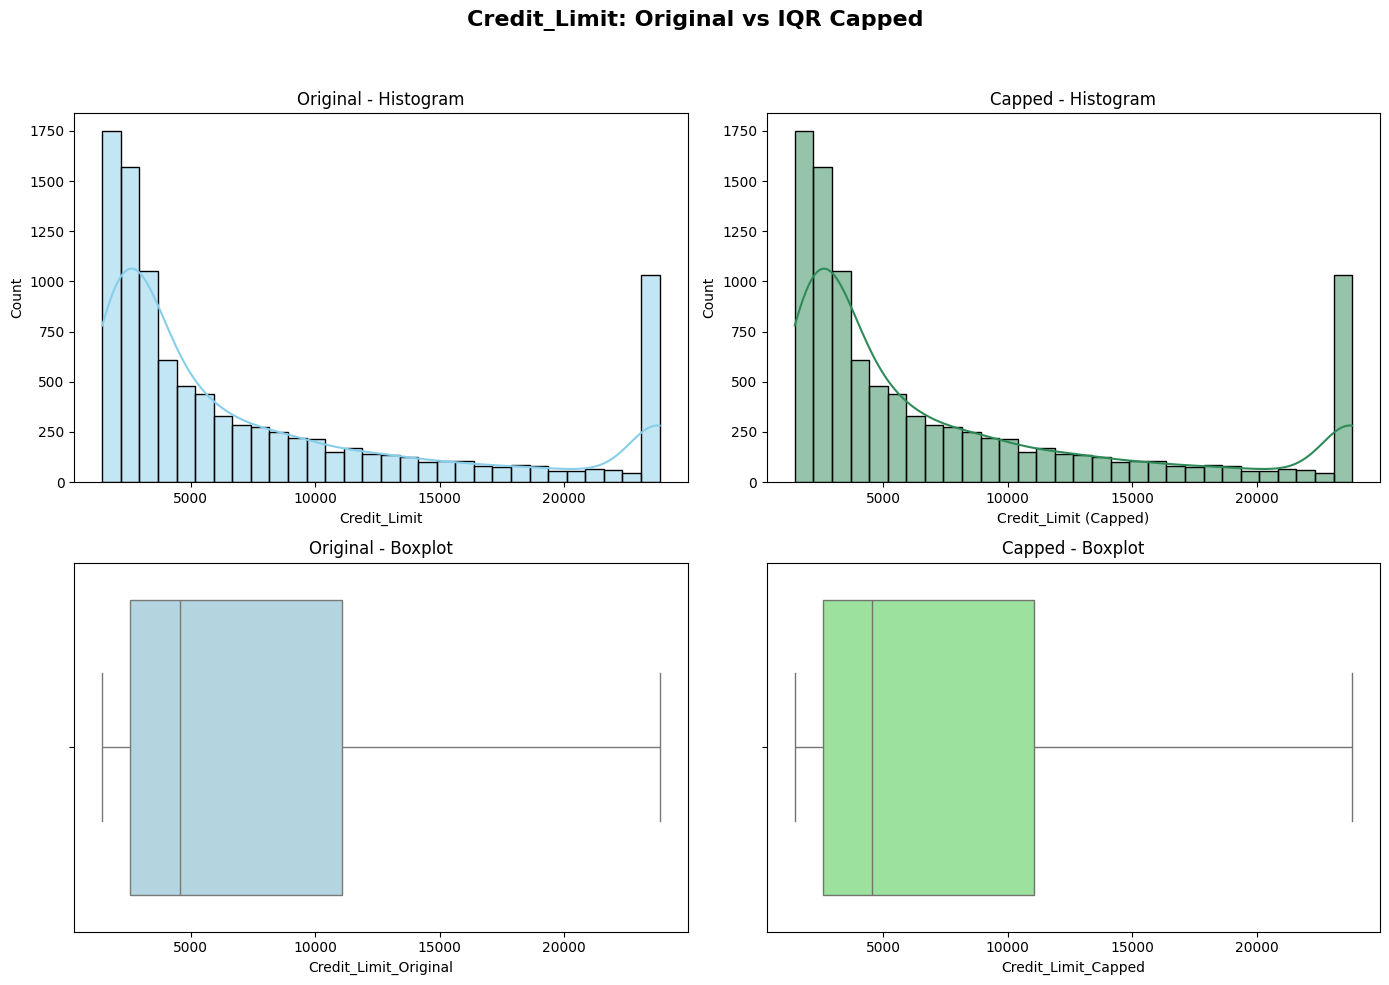

In [21]:
#Step 15. Create a Capped Version of Credit_Limit for Comparison Only
df['Credit_Limit_Capped'] = cap_outliers_iqr(df['Credit_Limit_Original'])

import matplotlib.pyplot as plt
import seaborn as sns

#Step 16. Ensure you have both columns ready
df['Credit_Limit_Original'] = df['Credit_Limit'].copy()
df['Credit_Limit_Capped'] = cap_outliers_iqr(df['Credit_Limit_Original'])

#Step 17. Set up side-by-side comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Credit_Limit: Original vs IQR Capped', fontsize=16, fontweight='bold')

#Step 18. Histogram - Original
sns.histplot(df['Credit_Limit_Original'], kde=True, bins=30, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Original - Histogram')
axes[0, 0].set_xlabel('Credit_Limit')

#Step 19. Histogram - Capped
sns.histplot(df['Credit_Limit_Capped'], kde=True, bins=30, ax=axes[0, 1], color='seagreen')
axes[0, 1].set_title('Capped - Histogram')
axes[0, 1].set_xlabel('Credit_Limit (Capped)')

#Step 20. Boxplot - Original
sns.boxplot(x=df['Credit_Limit_Original'], ax=axes[1, 0], color='lightblue')
axes[1, 0].set_title('Original - Boxplot')

#Step 21. Boxplot - Capped
sns.boxplot(x=df['Credit_Limit_Capped'], ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Capped - Boxplot')

#Step 22. Layout adjustment
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



8. Save the Cleaned Dataset to the Absolute Path

We save the transformed dataset to the `Input` folder for further analysis or dashboarding.


In [25]:
import os

input_path = r'C:\Users\Sheila\Documents\VSCODE PROJECTS\Hackathon2_Credit_Card_Churn_T5\Data\Input\Cleaned_BankChurners.csv'

#Step 23. Ensure the output directory exists
os.makedirs(os.path.dirname(input_path), exist_ok=True)

#Step 24. Save the cleaned dataset
df.to_csv(input_path, index=False)

print(f"Cleaned dataset saved to: {input_path}")


Cleaned dataset saved to: C:\Users\Sheila\Documents\VSCODE PROJECTS\Hackathon2_Credit_Card_Churn_T5\Data\Input\Cleaned_BankChurners.csv
